<a href="https://colab.research.google.com/github/paulcodrea/dissertation/blob/main/stock_price_prediction_SVM_RF_hourly_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install treeinterpreter
from sklearn.model_selection import train_test_split
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import svm
from sklearn.svm import SVR 

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
import datetime
# import GetOldTweets3 as got
# import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import sys
import re
import string
import json
import os

In [ ]:
# Predicting stock prices using Random Forest model
def RandomForestModel(df):
  # df = pd.read_csv('sentimentAnalysis_' + stockname +'.csv')
  train, test = train_test_split(df, shuffle=False, test_size=0.2)
  print(train.size)
  print(test.size)

  sentiment_score_list_train = []
  for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'negative'], df.loc[date, 'neutral'],  df.loc[date, 'positive']])
    sentiment_score_list_train.append(sentiment_score)
  numpy_df_train = np.asarray(sentiment_score_list_train)

  sentiment_score_list_test = []
  for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'negative'], df.loc[date, 'neutral'],  df.loc[date, 'positive']])
    sentiment_score_list_test.append(sentiment_score)
  numpy_df_test = np.asarray(sentiment_score_list_test)

  y_train = pd.DataFrame(train['Price'])
  y_test = pd.DataFrame(test['Price'])

  rf = RandomForestRegressor()
  rf.fit(numpy_df_train, y_train)
  prediction, bias, contributions = ti.predict(rf, numpy_df_test)

  print("\n\n")
  plt.figure()
  plt.plot(test['Price'].iloc[:].values)
  plt.plot(prediction.flatten())
  plt.title('Random Forest predicted prices')
  plt.ylabel('Stock Prices')
  plt.xlabel('Days')
  plt.legend(['actual', 'predicted'])
  plt.show()

  print("\n\n")
  print("RMSE value for Random Forest Model : ")
  rmse = sqrt(mean_squared_error(y_test, prediction.flatten()))
  print(rmse)
  print("\n\n")

In [ ]:
# Predicting stock prices using Support Vector Regression model
def SVRModel(stockname):
  # df = pd.read_csv('sentimentAnalysis_' + stockname +'.csv')
  train, test = train_test_split(df, shuffle=False, test_size=0.2)
  print(train.size)
  print(test.size)

  sentiment_score_list_train = []
  for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'negative'], df.loc[date, 'neutral'],  df.loc[date, 'positive']])
    sentiment_score_list_train.append(sentiment_score)
  numpy_df_train = np.asarray(sentiment_score_list_train)

  sentiment_score_list_test = []
  for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'negative'], df.loc[date, 'neutral'],  df.loc[date, 'positive']])
    sentiment_score_list_test.append(sentiment_score)
  numpy_df_test = np.asarray(sentiment_score_list_test)

  y_train = pd.DataFrame(train['Price'])
  y_test = pd.DataFrame(test['Price'])

  svr_rbf = SVR(kernel='rbf', C=1e6, gamma=0.1)
  svr_rbf.fit(numpy_df_train, y_train.values.flatten())
  output_test_svm = svr_rbf.predict(numpy_df_test)

  plt.figure()
  plt.plot(test['Price'].iloc[:].values)
  plt.plot(output_test_svm)
  plt.title('SVM predicted prices')
  plt.ylabel('Stock Prices')
  plt.xlabel('Days')
  plt.legend(['actual', 'predicted'])
  plt.show()

  print("\n\n")
  print("RMSE value for Support Vector Regression Model : ")
  rmse = sqrt(mean_squared_error(y_test, output_test_svm))
  print(rmse)
  print("\n\n")

In [ ]:
df = pd.read_csv('/content/hour_df.csv')

In [ ]:
# df.set_index('Date',inplace=True)
df.drop(columns=['coin_type'], inplace=True)
df.rename(columns={'close':'Price'}, inplace=True)
df

,date,positive,negative,neutral,score,Price
0,2022-01-13 17:00,0.099517,0.037228,0.863284,232.456765,0.1629
1,2022-01-13 18:00,0.088475,0.033548,0.877998,295.018028,0.1627
2,2022-01-13 19:00,0.094921,0.032796,0.872287,216.354902,0.1630
3,2022-01-13 20:00,0.091648,0.026843,0.881507,378.167873,0.1660
4,2022-01-13 21:00,0.099684,0.024527,0.875786,217.496336,0.1707
5,2022-01-13 22:00,0.084185,0.031894,0.883919,191.059769,0.1671
6,2022-01-13 23:00,0.116418,0.026720,0.856872,217.261591,0.1717
7,2022-01-14 00:00,0.099455,0.025557,0.874990,113.171744,0.1781
8,2022-01-14 01:00,0.090157,0.028529,0.881309,163.900420,0.1764
9,2022-01-14 02:00,0.090497,0.026574,0.882924,258.128379,0.1775


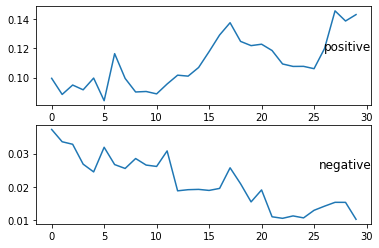

In [ ]:
values = df.values
# specify columns to plot
groups = [1, 2]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

144
36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


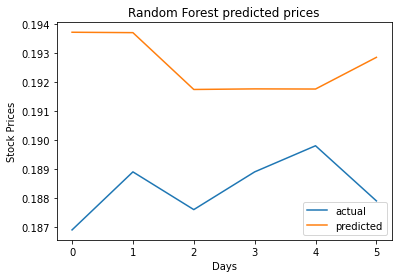




RMSE value for Random Forest Model : 
0.004528395263961246





In [ ]:
RandomForestModel(df)

144
36


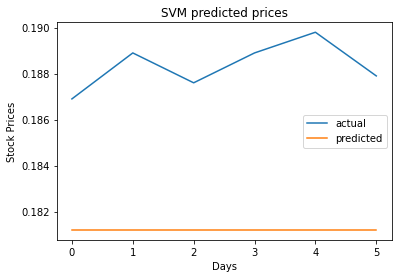




RMSE value for Support Vector Regression Model : 
0.007198147909937181





In [ ]:
SVRModel(df)